In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [3]:
from scipy import stats
import numpy as np

In [4]:
df1 = pd.read_excel("0802_500Microns.xlsx")
df1

,Cap. Bridge (bit),Voltage steps,V(PZT)(before code),V(PZT)(after code),Voltage diff.,real_V,CH1 M-E Sensor,CH1 ME_D,CH1 ME_A_dis,CH2 M-E Sensor,CH2 ME_D,CH2 ME_A_dis,Fringes,Fringe_D,fringe_A_dis,Time
0,NaN,NaN,(monitor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28761.0,NaN,-0.001,0.382,0.383,3.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04:04:00
2,29161.0,400.0,0.386,1.461,1.075,14.61,449.94,NaN,NaN,1314.58,NaN,NaN,19.0,6.0116,6.0116,04:06:00
3,29561.0,400.0,1.428,2.167,0.739,21.67,456.47,6.53,6.53,1320.89,6.31,6.31,19.0,6.0116,12.0232,04:08:00
4,29961.0,400.0,2.106,2.783,0.677,27.83,463.04,6.57,13.10,1327.24,6.35,12.66,19.0,6.0116,18.0348,04:09:00
5,30361.0,400.0,2.716,3.377,0.661,33.77,469.63,6.59,19.69,1333.60,6.36,19.02,20.0,6.3280,24.3628,04:11:00
6,30761.0,400.0,3.328,4.010,0.682,40.10,476.32,6.69,26.38,1340.05,6.45,25.47,21.0,6.6444,31.0072,04:12:00
7,31161.0,400.0,NaN,4.600,4.600,46.00,483.02,6.70,33.08,1346.52,6.47,31.94,20.0,6.3280,37.3352,04:14:00
8,31561.0,400.0,4.56,5.270,0.710,52.70,489.77,6.75,39.83,1353.02,6.50,38.44,20.0,6.3280,43.6632,04:15:00
9,31961.0,400.0,5.19,5.910,0.720,59.10,496.54,6.77,46.60,1359.55,6.53,44.97,19.0,6.0116,49.6748,04:16:00


In [23]:
#column of DAC values
DAC_values1 = df1["Cap. Bridge (bit)"][3:28]
print(DAC_values1)

3     29561.0
4     29961.0
5     30361.0
6     30761.0
7     31161.0
8     31561.0
9     31961.0
10    32361.0
11    32761.0
12    33161.0
13    33561.0
14    33961.0
15    33561.0
16    33161.0
17    32761.0
18    32361.0
19    31961.0
20    31561.0
21    31161.0
22    30761.0
23    30361.0
24    29561.0
25    29161.0
26    28761.0
27    28361.0
Name: Cap. Bridge (bit), dtype: float64


In [24]:
#column of sensor 1 (channel 1)
ME_A_dis_CH1_1st = df1["CH1 ME_A_dis"][3:28]
print(ME_A_dis_CH1_1st)

3      6.53
4     13.10
5     19.69
6     26.38
7     33.08
8     39.83
9     46.60
10    53.41
11    60.24
12    67.61
13    75.61
14    83.66
15    75.61
16    67.61
17    60.23
18    53.40
19    46.60
20    39.82
21    33.08
22    26.39
23    19.72
24     6.57
25     0.05
26    -6.41
27   -13.39
Name: CH1 ME_A_dis, dtype: float64


In [25]:
#column of sensor 2 (channel 2)
ME_A_dis_CH2_1st = df1["CH2 ME_A_dis"][3:28]
print(ME_A_dis_CH2_1st)

3      6.31
4     12.66
5     19.02
6     25.47
7     31.94
8     38.44
9     44.97
10    51.54
11    58.13
12    65.25
13    72.97
14    80.74
15    72.97
16    65.25
17    58.13
18    51.54
19    44.98
20    38.44
21    31.94
22    25.48
23    19.05
24     6.36
25     0.08
26    -6.16
27   -12.89
Name: CH2 ME_A_dis, dtype: float64


<IPython.core.display.Javascript object>


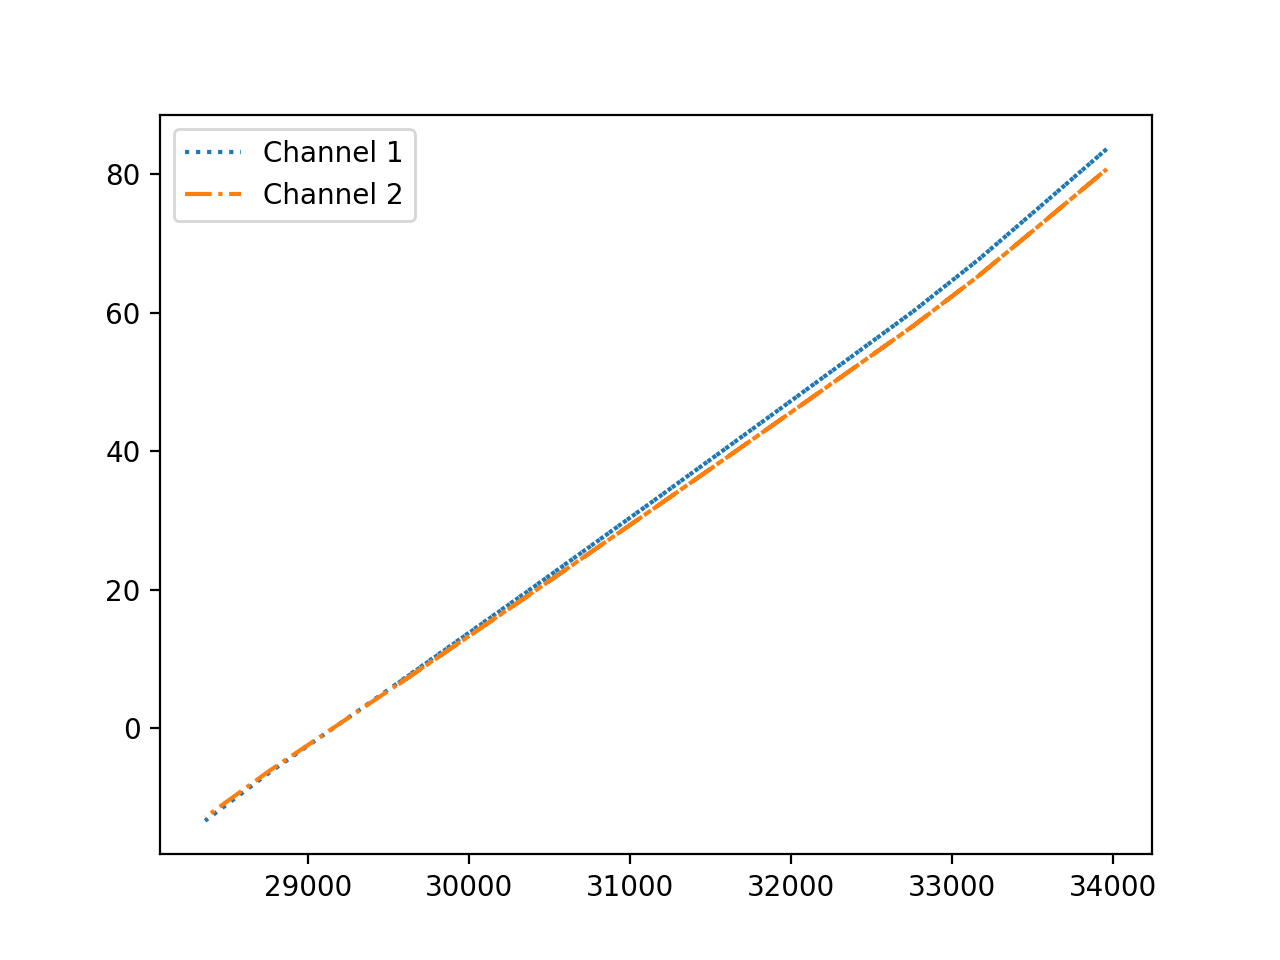

In [31]:
#plot of ME accumulated displacement vs. accumulated ME displacement for ch.1 & 2

plt.close("all")

x = DAC_values1
y = ME_A_dis_CH1_1st
z = ME_A_dis_CH2_1st

plt.plot(x, y, label = "Channel 1", linestyle=":")
plt.plot(x, z, label = "Channel 2", linestyle = "-.")

plt.legend()
plt.show()